<a href="https://colab.research.google.com/github/Andru-1987/86400_data_science_i_diplomatura/blob/main/04_manipulacion_de_datos_pandas/clase_practica/clase_04_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pune_dataset_url:str =  r"https://raw.githubusercontent.com/Andru-1987/86400_data_science_i_diplomatura/refs/heads/main/04_manipulacion_de_datos_pandas/datasets/pune_1965_to_2002.csv"

pune_df:pd.DataFrame = pd.read_csv(pune_dataset_url, encoding="utf8", sep=",")
pune_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [ ]:
pune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    38 non-null     int64  
 1   Jan     38 non-null     float64
 2   Feb     38 non-null     float64
 3   Mar     38 non-null     float64
 4   Apr     38 non-null     float64
 5   May     38 non-null     float64
 6   Jun     38 non-null     float64
 7   Jul     38 non-null     float64
 8   Aug     38 non-null     float64
 9   Sep     38 non-null     float64
 10  Oct     38 non-null     float64
 11  Nov     38 non-null     float64
 12  Dec     38 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 4.0 KB


In [ ]:
pune_df.Year = pd.to_datetime(pune_df.Year, format="%Y").dt.to_period('Y')

In [ ]:
pune_df.set_index("Year", inplace=True)

In [ ]:
pune_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 38 entries, 1965 to 2002
Freq: Y-DEC
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     38 non-null     float64
 1   Feb     38 non-null     float64
 2   Mar     38 non-null     float64
 3   Apr     38 non-null     float64
 4   May     38 non-null     float64
 5   Jun     38 non-null     float64
 6   Jul     38 non-null     float64
 7   Aug     38 non-null     float64
 8   Sep     38 non-null     float64
 9   Oct     38 non-null     float64
 10  Nov     38 non-null     float64
 11  Dec     38 non-null     float64
dtypes: float64(12)
memory usage: 3.9 KB


In [ ]:
meses = ["Jan","Feb","Mar"]

In [ ]:
# Muy buenas practicas!
(
    pune_df
    .groupby(level=0)[meses]
    .mean()
    .nlargest(3, columns=["Mar"])
)

,Jan,Feb,Mar
Year,,,
1989,0.008,0.0,9.619
1980,0.008,0.0,8.329
1974,0.000,0.0,6.427


## Manejo de strings

In [ ]:
presidents_df = pd.read_csv(
"https://docs.google.com/spreadsheets/d/e/2PACX-1vRj1KjW_raDRzdMieSzaAvyKtl2ub8Y6zM9X-4rhIB9C3NG-whBjTzj6UVTGo6qJ4fUT7x7SiCSW83u/pub?gid=1795471360&single=true&output=csv"
)


presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45 non-null     int64 
 1   S.No.       45 non-null     int64 
 2   start       45 non-null     object
 3   end         44 non-null     object
 4   president   45 non-null     object
 5   prior       45 non-null     object
 6   party       45 non-null     object
 7   vice        45 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB


In [ ]:
presidents_df.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [ ]:
presidents_df = presidents_df.iloc[ : , 2: ]

In [ ]:
columns_date: list[str] = ["start","end"]
FORMAT:str = "%B %d, %Y"

for index, col in enumerate(columns_date, start=1):
    print(f"Paso:{index} --> Transform {col} en tipo fecha con este formato ISO-8601")
    presidents_df[col] = pd.to_datetime(presidents_df[col], format=FORMAT, errors="coerce")

Paso:1 --> Transform start en tipo fecha con este formato ISO-8601
Paso:2 --> Transform end en tipo fecha con este formato ISO-8601


In [ ]:
presidents_df.head()

,start,end,president,prior,party,vice
0,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [ ]:
presidents_df.loc[presidents_df.president.str.startswith('H')]

,start,end,president,prior,party,vice
30,1929-03-04,1933-03-04,Herbert Hoover,3rd United States Secretary of Commerce (19...,Republican,Charles Curtis
32,1945-04-12,1953-01-20,Harry S. Truman,34th Vice President of the United States,Democratic,Office vacant


## Graficos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plt.style.use('ggplot')

In [ ]:
# grafico de lineas
x = np.linspace(0,100,1_000)

df = pd.DataFrame({
    "x": x,
    "y": np.cos(x)
})

df.head()

,x,y
0,0.0000,1.000000
1,0.1001,0.994994
2,0.2002,0.980027
3,0.3003,0.955248
4,0.4004,0.920905


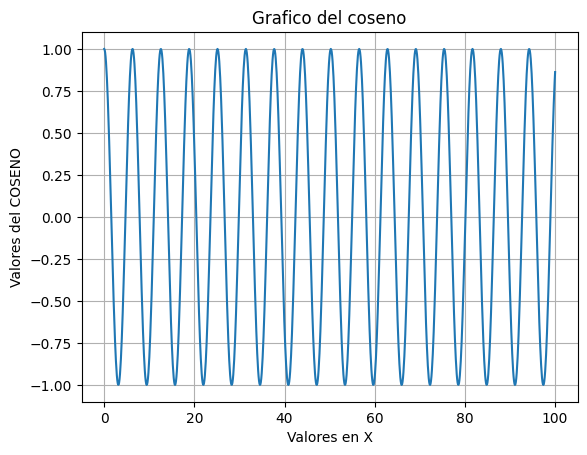

In [ ]:
plt.plot(df.x, df.y)

plt.title("Grafico del coseno")
plt.xlabel("Valores en X")
plt.ylabel("Valores del COSENO")

plt.grid()

In [ ]:
presidents_df["voters"] = presidents_df.president.str.len() * np.random.randint(8_000,10_000)

In [ ]:
presidents_df.head()

,start,end,president,prior,party,vice,voters
0,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,158270
1,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,93100
2,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,148960
3,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,121030
4,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,111720


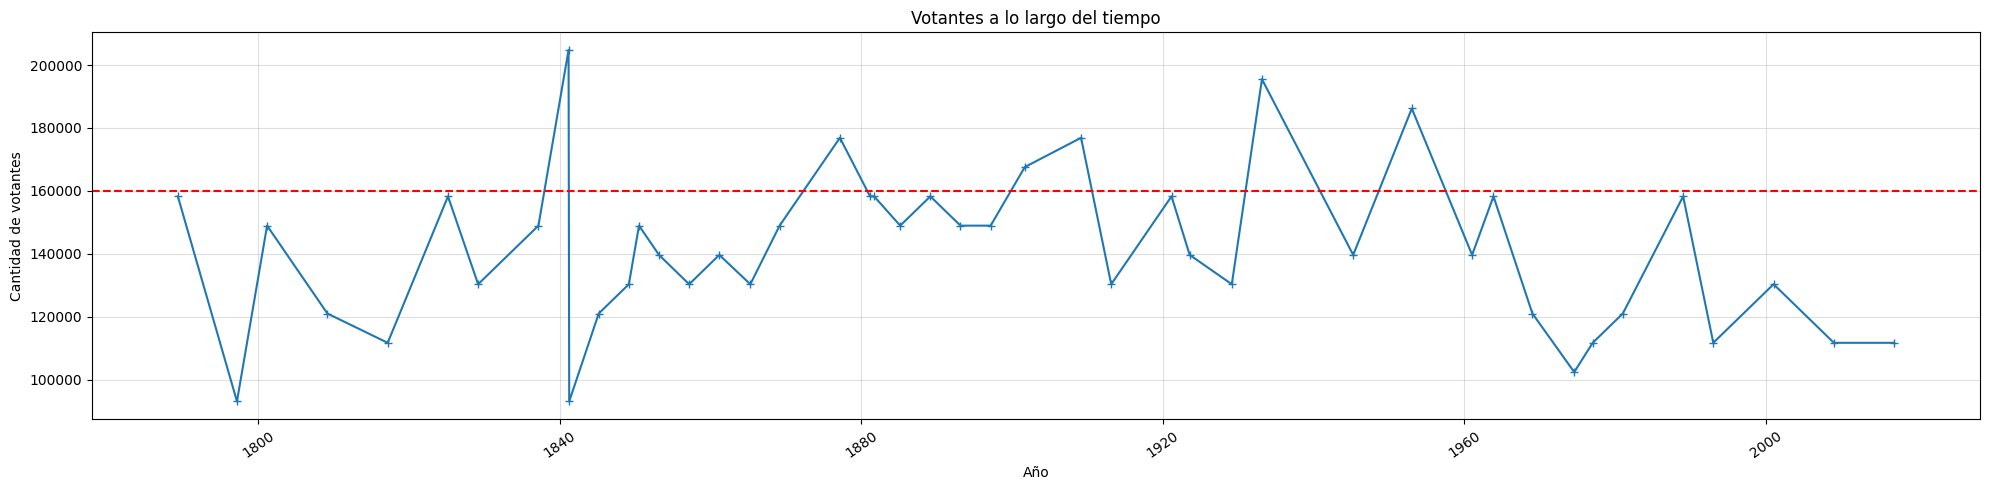

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(
    presidents_df.start,
    presidents_df.voters,
    marker='+'
)

plt.axhline(y=160_000, color='r', linestyle='dashed')


plt.title("Votantes a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Cantidad de votantes")

plt.xticks(rotation=35)
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

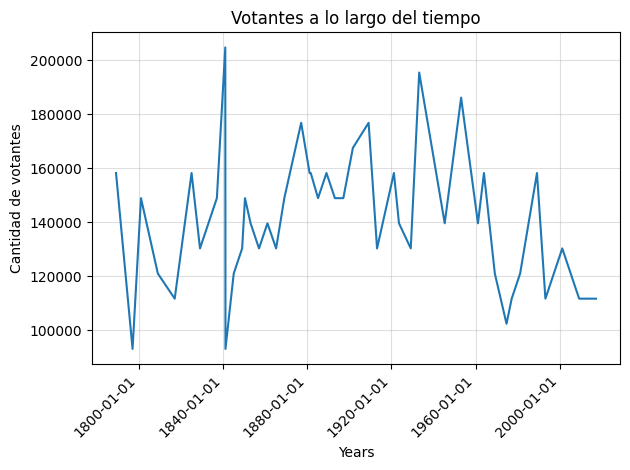

In [ ]:
import matplotlib.dates as mdates

plt.plot(
    presidents_df.start,
    presidents_df.voters
)

plt.title("Votantes a lo largo del tiempo")
plt.xlabel("Years")
plt.ylabel("Cantidad de votantes")

# Formatear el eje X para mostrar fechas completas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')  # ha='right' alinea mejor las fechas rotadas

plt.grid(True, alpha=0.4)
plt.tight_layout()  # Ajusta automáticamente para que no se corten las etiquetas

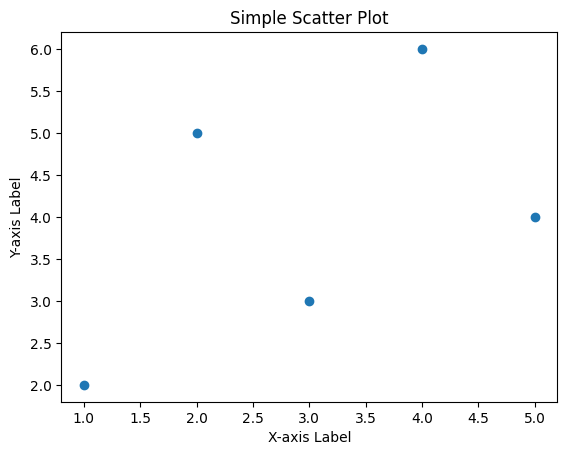

In [ ]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 5, 3, 6, 4])

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

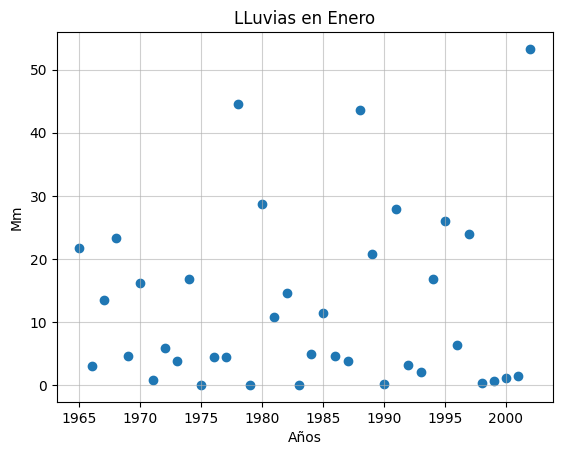

In [ ]:
plt.scatter(
    pune_df.index.year,
    pune_df.Apr
)


plt.title("LLuvias en Enero")
plt.xlabel("Años")
plt.ylabel("Mm")

plt.grid(True, alpha=0.6)
plt.show()

# grafico de barras

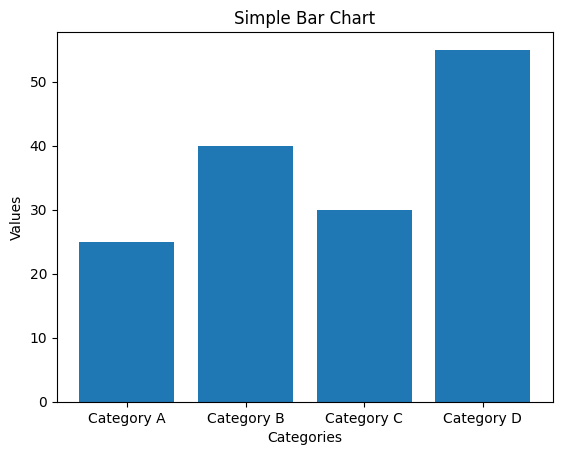

In [ ]:
# Data for the bar chart
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 55]

# Create the bar chart
plt.bar(categories, values)

# Add labels and a title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

# Display the plot
plt.show()

Quiero hacer un grafico de barras -> de los presidentes que tuvieron mayor cantidad de votantes

In [ ]:
top_pres_by_voters = (
    presidents_df
    .groupby("president")["voters"]
    .sum()
    .nlargest(5)
    .reset_index()
)

top_pres_by_voters

,president,voters
0,Grover Cleveland,297920
1,William Henry Harrison,204820
2,Franklin D. Roosevelt,195510
3,Dwight D. Eisenhower,186200
4,Rutherford B. Hayes,176890


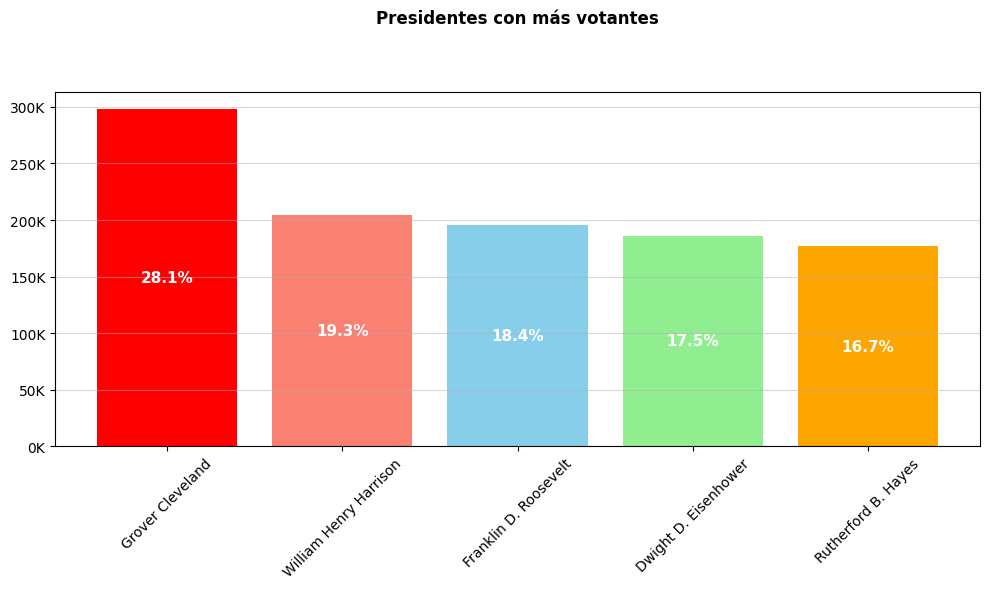

In [ ]:
# Calcular el total y los porcentajes
total_voters = top_pres_by_voters["voters"].sum()
percentages = (top_pres_by_voters["voters"] / total_voters) * 100


plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_pres_by_voters["president"],
    top_pres_by_voters["voters"],
    color=['red', 'salmon', 'skyblue', 'lightgreen', 'orange']
)

plt.xticks(rotation=45)
plt.title("Presidentes con más votantes", pad=50, fontweight='bold')
plt.grid(True, alpha=0.5, axis='y')

# Agregar porcentajes dentro de las barras
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posición horizontal
        height / 2,                         # posición vertical (mitad de la barra)
        f"{pct:.1f}%",                      # texto del porcentaje
        ha='center', va='center', color='white', fontweight='bold', fontsize=11
    )

# tip advanced
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()


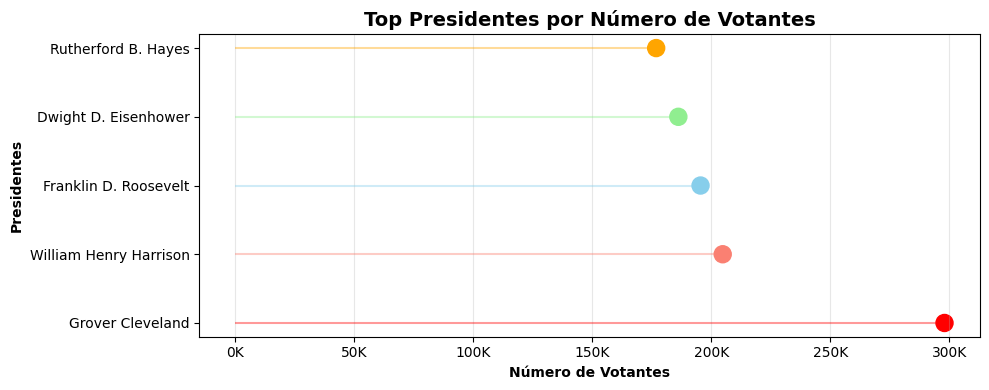

In [ ]:
plt.figure(figsize=(10, 4))  # Reducir altura de la figura

colors = ['red', 'salmon', 'skyblue', 'lightgreen', 'orange']


plt.hlines(y=range(len(top_pres_by_voters)),
           xmin=0,
           xmax=top_pres_by_voters.voters,
           colors=colors,
           alpha=0.4)

plt.scatter(top_pres_by_voters.voters,
            range(len(top_pres_by_voters)),
            c=colors,
            s=150,
            linewidth=1
            )

plt.yticks(range(len(top_pres_by_voters)), top_pres_by_voters.president)
plt.xlabel('Número de Votantes', fontweight='bold')
plt.ylabel('Presidentes', fontweight='bold')
plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

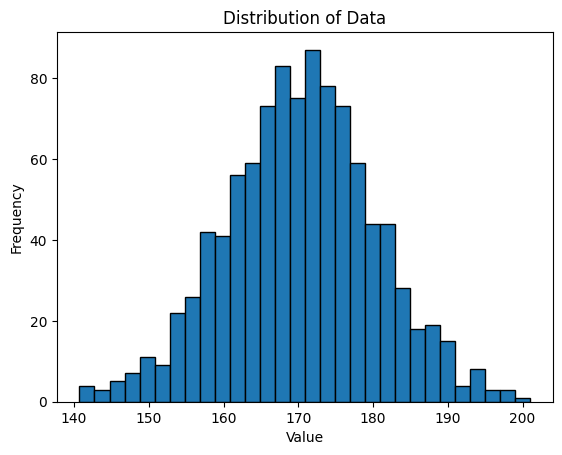

In [ ]:
# Generate some sample data
data = np.random.normal(170, 10, 1000) # 1000 values from a normal distribution

# Create the histogram
plt.hist(data, bins=30, edgecolor='black') # 'bins' controls the number of bins, 'edgecolor' adds outlines

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')

# Display the plot
plt.show()

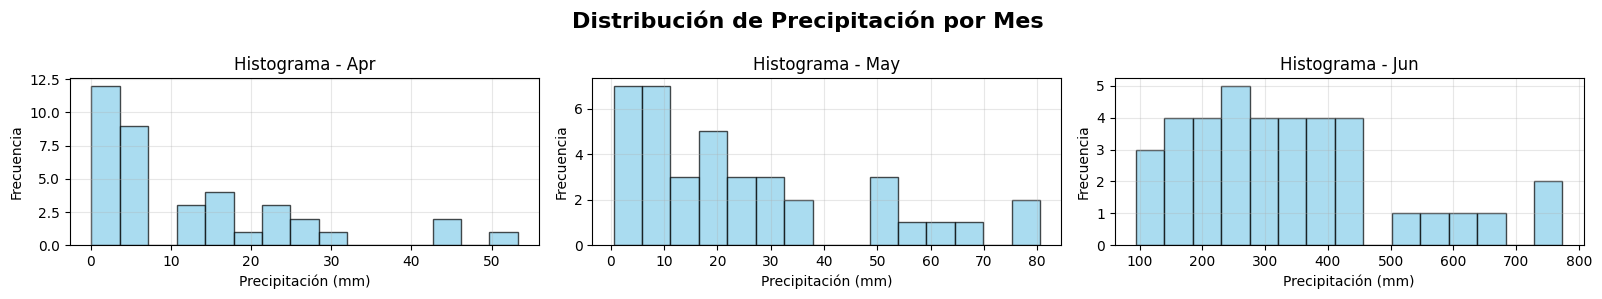

In [ ]:
meses = [ 'Apr', 'May', 'Jun']

plt.figure(figsize=(16, 3))

for i, mes in enumerate(meses, 1):
    plt.subplot(1, 3, i)
    plt.hist(pune_df[mes], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {mes}')
    plt.xlabel('Precipitación (mm)')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

plt.suptitle('Distribución de Precipitación por Mes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

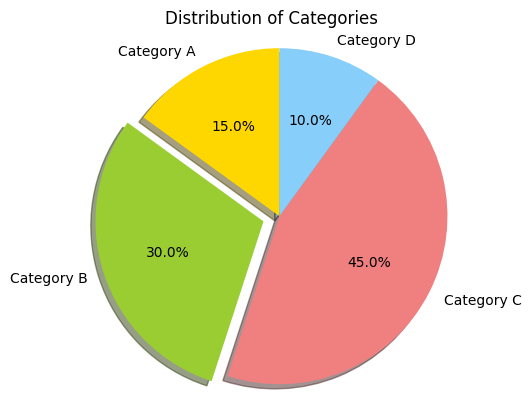

In [ ]:
sizes = [15, 30, 45, 10]
labels = ['Category A', 'Category B', 'Category C', 'Category D']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # Explode 'Category B'

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Distribution of Categories')
plt.show()

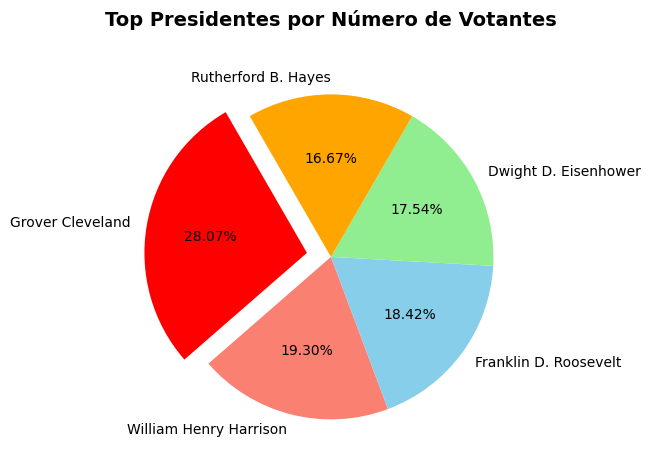

In [ ]:
# Crear explode dinámicamente
explode = [0.15 if i == 0 else 0 for i in range(len(top_pres_by_voters))]

colors = ['red', 'salmon', 'skyblue', 'lightgreen', 'orange']

plt.pie(
    top_pres_by_voters.voters,
    labels=top_pres_by_voters.president,
    autopct=lambda p: f'{p:.2f}%',
    colors=colors,
    startangle=120,
    explode=explode
)

plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
data = np.random.normal(loc=0, scale=1, size=100) # Single dataset

data_multiple = [np.random.normal(loc=0, scale=1, size=100),
                 np.random.normal(loc=2, scale=0.5, size=100),
                 np.random.normal(loc=-1, scale=1.5, size=100)] # Multiple datasets


df_single = pd.DataFrame({
    'values': data
})


df_multiple = pd.DataFrame({
    'col_uno': data_multiple[0],
    'col_dos': data_multiple[1],
    'col_tres': data_multiple[2]
})


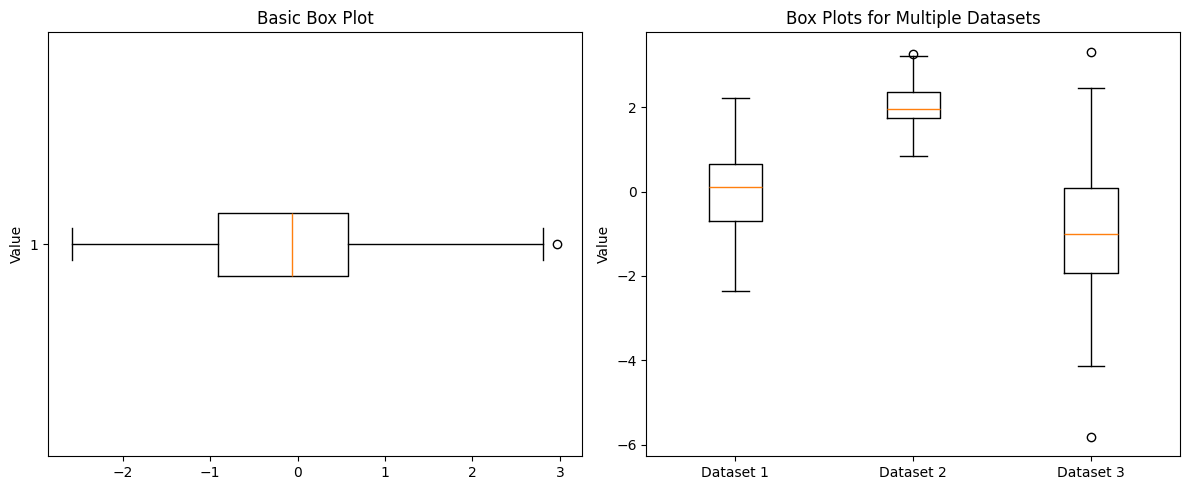

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Basic box plot for single dataset
ax1.boxplot(df_single.values,vert=False)
ax1.set_title('Basic Box Plot')
ax1.set_ylabel('Value')

# Box plot for multiple datasets
ax2.boxplot(df_multiple.values)
ax2.set_title('Box Plots for Multiple Datasets')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Dataset 1', 'Dataset 2', 'Dataset 3'])
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

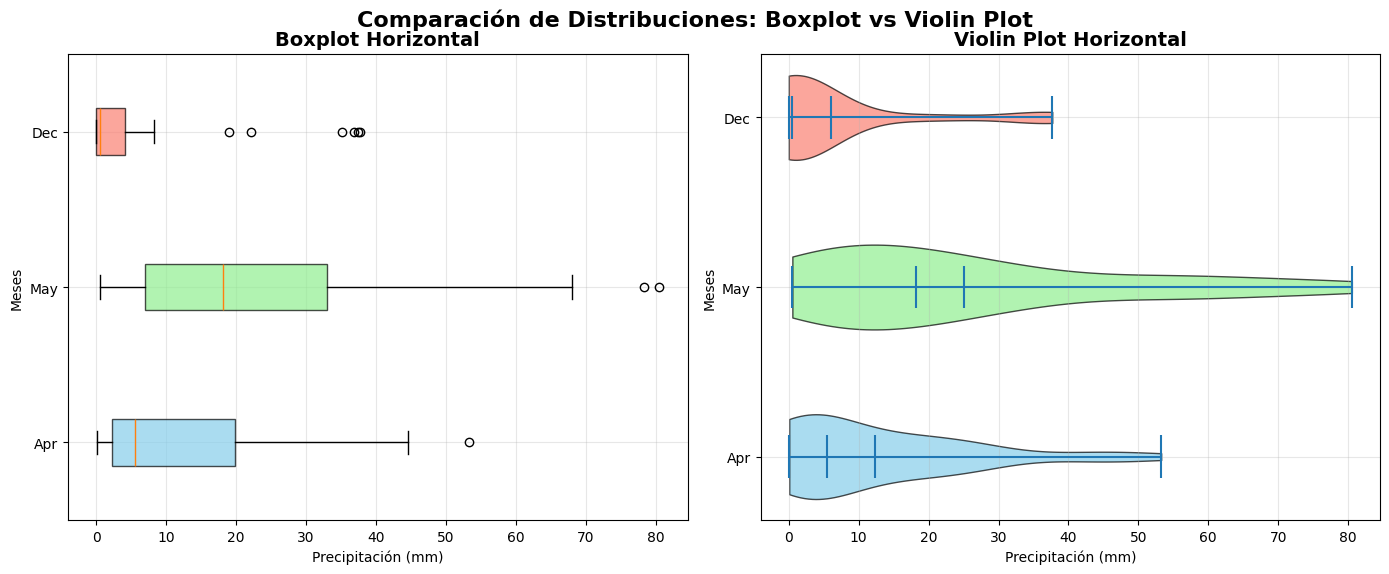

In [ ]:
meses = ['Apr', 'May', 'Dec']
colores = ['skyblue', 'lightgreen', 'salmon']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# BOXPLOT HORIZONTAL
box_plot = ax1.boxplot([pune_df[mes] for mes in meses],
                       tick_labels=meses,
                       patch_artist=True,
                       vert=False)  # Horizontal


for patch, color in zip(box_plot['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Boxplot Horizontal', fontsize=14, fontweight='bold')
ax1.set_xlabel('Precipitación (mm)')
ax1.set_ylabel('Meses')
ax1.grid(True, alpha=0.3)

# VIOLIN PLOT HORIZONTAL
violin_parts = ax2.violinplot([pune_df[mes] for mes in meses],
                             vert=False,  # Horizontal
                             showmeans=True,
                             showmedians=True)

for i, (pc, color) in enumerate(zip(violin_parts['bodies'], colores)):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')

# Configurar etiquetas del violin plot
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(meses)
ax2.set_title('Violin Plot Horizontal', fontsize=14, fontweight='bold')
ax2.set_xlabel('Precipitación (mm)')
ax2.set_ylabel('Meses')
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparación de Distribuciones: Boxplot vs Violin Plot',
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()